In [34]:
import numpy as np
from scipy import stats
import pandas as pd
import statsmodels.api as sm

# 그래프 Visualization
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus'] = False
font_location = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname = font_location).get_name()
mpl.rc('font',family= font_name)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# 정규분포 및 회귀분석 등
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
# Decision tree
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
# 랜덤 포레스트
from sklearn.ensemble import RandomForestRegressor
# 그래디언트 부스팅
from sklearn.ensemble import GradientBoostingRegressor
#서포트 벡터 머신
from sklearn.svm import SVR
# KNN
from sklearn.neighbors import KNeighborsRegressor
# 시계열분석
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

#평가 함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#스케일링
from sklearn.preprocessing import scale, minmax_scale, robust_scale
#다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
#선형 회귀모형
from sklearn.linear_model import LinearRegression
#변수선택법 (후진제거법)
from sklearn.feature_selection import RFE
#스케일 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler

In [35]:
df_raw = pd.read_csv("/home/pirl/Statistics/Day3_0715/체질검사.csv", engine = "python", encoding="CP949")
df_raw.shape

(252, 14)

In [36]:
df_raw_y = df_raw['FAT']
df_raw_x = df_raw.drop("FAT", axis = 1, inplace = False)

In [37]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y,
                                                                test_size = 0.3, random_state=1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (176, 13)
train data Y size : (176,)
test data X size : (76, 13)
test data Y size : (76,)


In [38]:
tree_final = DecisionTreeRegressor(random_state = 1234, min_samples_leaf=18, min_samples_split=38, max_depth=4)
tree_final.fit(df_train_x, df_train_y)

print(tree_final.score(df_train_x,df_train_y))
print(tree_final.score(df_test_x,df_test_y))

0.7271017434960408
0.5303265305849302


In [39]:
rf_final = RandomForestRegressor(random_state = 775, n_estimators = 10, min_samples_leaf=1, min_samples_split =2, max_depth=17)
rf_final.fit(df_train_x, df_train_y)

print("Score on training set: {:.3f}".format(rf_final.score(df_train_x,df_train_y)))
print("score on test seg: {:.3f}".format(rf_final.score(df_test_x,df_test_y)))

Score on training set: 0.938
score on test seg: 0.645


In [40]:
gb_final = GradientBoostingRegressor(random_state=1234, n_estimators = 60, min_samples_leaf=4, min_samples_split =16,
                                   max_depth =4, learning_rate =0.1)
gb_final.fit(df_train_x, df_train_y)

print("Score on training set: {:.3f}".format(gb_final.score(df_train_x,df_train_y)))
print("score on test seg: {:.3f}".format(gb_final.score(df_test_x,df_test_y)))

Score on training set: 0.973
score on test seg: 0.573


In [41]:
svm_final = SVR(C = 10, gamma = 0.1, epsilon = 0.5)
svm_final.fit(df_train_x, df_train_y)

print("Score on training set: {:.3f}".format(svm_final.score(df_train_x,df_train_y)))
print("score on test seg: {:.3f}".format(svm_final.score(df_test_x,df_test_y)))

Score on training set: 0.910
score on test seg: -0.038


In [45]:
models = ["회귀분석","의사결정나무","랜덤 포레스트","그래디언트 부스팅"]
mse, rmse, mae, mape = [],[],[],[]

In [46]:
dt_y_pred = tree_final.predict(df_test_x)
rf_y_pred = rf_final.predict(df_test_x)
gb_y_pred = gb_final.predict(df_test_x)
svm_y_pred = svm_final.predict(df_test_x)

In [47]:
mse.append(mean_squared_error(df_test_y, dt_y_pred))
rmse.append(root_mean_squared_error(df_test_y, dt_y_pred))
mae.append(mean_absolute_error(df_test_y, dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, dt_y_pred))

mse.append(mean_squared_error(df_test_y, rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y, rf_y_pred))
mae.append(mean_absolute_error(df_test_y, rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, rf_y_pred))

mse.append(mean_squared_error(df_test_y, gb_y_pred))
rmse.append(root_mean_squared_error(df_test_y, gb_y_pred))
mae.append(mean_absolute_error(df_test_y, gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, gb_y_pred))

mse.append(mean_squared_error(df_test_y, svm_y_pred))
rmse.append(root_mean_squared_error(df_test_y, svm_y_pred))
mae.append(mean_absolute_error(df_test_y, svm_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, svm_y_pred))

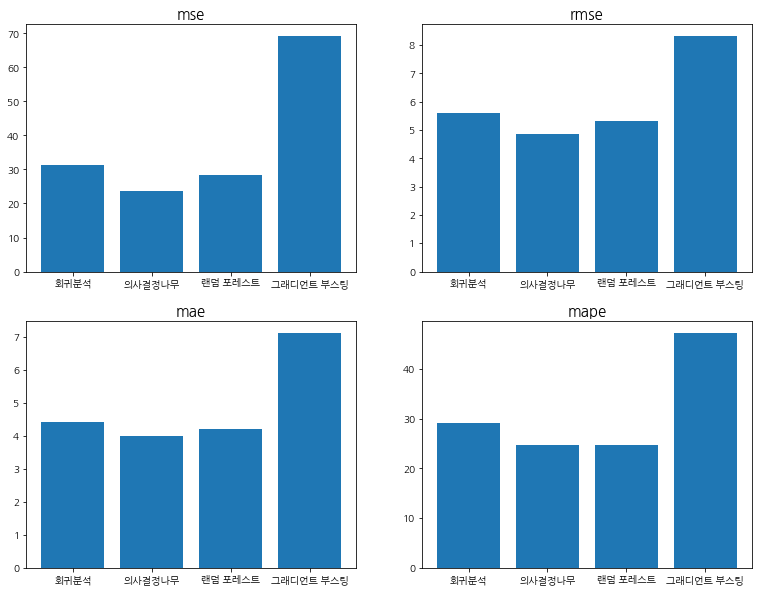

In [48]:
fig, ax = plt.subplots(2,2, figsize = (13,10))
ax[0,0].bar(models,mse)
ax[0,0].set_title("mse").set_fontsize(15)

ax[0,1].bar(models,rmse)
ax[0,1].set_title("rmse").set_fontsize(15)

ax[1,0].bar(models,mae)
ax[1,0].set_title("mae").set_fontsize(15)

ax[1,1].bar(models,mape)
ax[1,1].set_title("mape").set_fontsize(15)